60000 train samples
10000 test samples
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 activation_9 (Activation)   (None, 128)               0         
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 activation_10 (Activation)  (None, 128)               0         
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dens

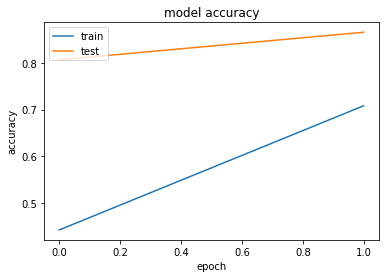

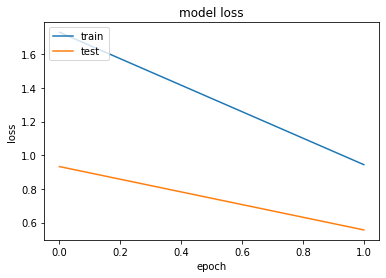

In [8]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 2
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
from keras import regularizers
from keras.layers.core import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(64,input_dim=64,kernel_regularizer=regularizers.l2(0.01)))

In [6]:
# batch_size , epochs , complexity of neural network 
predictioons = model.predict(X)

NameError: name 'X' is not defined

In [9]:
# 역전파의 개요
# The script MUST contain a function named azureml_main
# which is the entry point for this module.

# imports up here can be used to 
import pandas as pd
import theano
import theano.tensor as T
from theano import function

from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
# The entry point function can contain up to two input arguments:
#   Param<dataframe1>: a pandas.DataFrame
#   Param<dataframe2>: a pandas.DataFrame
def azureml_main(dataframe1 = None, dataframe2 = None):
    # Execution logic goes here
    # print('Input pandas.DataFrame #1:\r\n\r\n{0}'.format(dataframe1))

    # If a zip file is connected to the third input port is connected,
    # it is unzipped under ".\Script Bundle". This directory is added
    # to sys.path. Therefore, if your zip file contains a Python file
    # mymodule.py you can import it using:
    # import mymodule
    model = Sequential()
    model.add(Dense(1, input_dim=784, activation="relu"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    data = np.random.random((1000,784))
    labels = np.random.randint(2, size=(1000,1))
    model.fit(data, labels, nb_epoch=10, batch_size=32)
    model.evaluate(data, labels)
    
    return dataframe1,

ModuleNotFoundError: No module named 'pandas'

In [11]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np


# pre-built and pre-trained deep learning VGG16 model
base_model = VGG16(weights='imagenet', include_top=True)
for i, layer in enumerate(base_model.layers):
	print (i, layer.name, layer.output_shape)

# extract features from block4_pool block
model = Model(input=base_model.input, output=base_model.get_layer('block4_pool').output)

img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# get the features from this block
features = model.predict(x)

print(features)


553476096/553467096 [==============================] - 99s 0us/step
0 input_1 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


TypeError: ('Keyword argument not understood:', 'input')